# Modeling

## Open items to do 
 - utilize cross validation to measure model performance
 - utilize cross validation to make predictions on training data not the test data
 - set classes to be predicted with a measure of Biden's victory that takes MOE into consideration**
 - include measures such as precison and recall to really gauge performance of models
 - most important 
 - **ROC curves**
 - XGBOOST model**
 - can this be done with a deep learning model
 - Readme
 - start making dashboards/outputs
 - get new data and add to see if scores are any better**
 - feature importance - take out the feature that might be to close to the target**
 - see if GridSearch has CrossValidation
 - **clean up the EDA notebook**
 - SQL

In [97]:
#pip install eli5

In [115]:
import seaborn as sns
import pandas as pd
import datetime as dt
import eli5
import waterfall_chart
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pickle


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer 
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.regressor import PredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import ROCAUC
import xgboost as xgb

In [117]:
# getting tweet df up and running
Master_tweet_dataset = pickle.load(open('Master_Tweet_dataset.pickle','rb'))
Master_tweet_dataset = Master_tweet_dataset.drop('Spread',axis=1)

In [118]:
len(Master_tweet_dataset['Target'])

24681

In [119]:
## Variable Designation#
X = Master_tweet_dataset.drop(['Target'],axis=1)
y= Master_tweet_dataset.iloc[:,-1]

In [120]:
#apply the LabelEncoder to y values to get rid of continuous error
lab_enc = LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)


In [121]:
len(training_scores_encoded)

24681

In [122]:
#def datetime_to_int(dt):
 #   return int(dt.strftime("%Y%m%d"))

In [123]:
#X_train['date'] = X_train['date'].astype(float)

## Pipeline Creation

In [124]:
#Classifer being used in current Pipeline so future changes can be made
Model = DummyRegressor()

#splitting dataframe into numeric and categoric columns
numeric_features = ['likes_count','word_count','avg_word_length','stopwords_count',
                   'char_count','Sentiment']
numeric_transformer = Pipeline([('scaler',StandardScaler())])

categorical_features = ['Target']
#categorical_transformer = Pipeline([('encoder',LabelEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])#,('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Model)])

## Data Split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, training_scores_encoded,test_size=.20)

## Models

### Baseline Model

In [126]:
clf.fit(X_train,y_train,)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['likes_count', 'word_count',
                                                   'avg_word_length',
                                                   'stopwords_count',
                                                   'char_count',
                                                   'Sentiment'])])),
                ('classifier', DummyRegressor())])

In [127]:
clf.score(X_test,y_test)

-5.924250863054148e-05

### Decision Tree Classifier

In [128]:
#Classifer being used in current Pipeline so future changes can be made
Model = DecisionTreeClassifier()

#splitting dataframe into numeric and categoric columns
numeric_features = ['likes_count','word_count','avg_word_length','stopwords_count',
                   'char_count','Sentiment']
numeric_transformer = Pipeline([('scaler',StandardScaler())])

#categorical_features = ['username']
#categorical_transformer = Pipeline([('Encoder',LabelEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)#('cat', categorical_transformer, categorical_features)
        ])
    
clf_DT = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Model)])



In [129]:
## Finding best parameters
parameters={'criterion': ('gini','entropy'), 'splitter': ('best', 'random')}

model = DecisionTreeClassifier()

clf_DT = GridSearchCV(model, parameters)

clf_DT.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'splitter': ('best', 'random')})

In [130]:
#Results of GridSearchCV
print('\n ============================================================================================')
print('\n Results of the GridSearchCV on Decision Tree Classifier')
print('\n ============================================================================================')
print('\n The best parameters to use in a model are: \n',clf_DT.best_params_)
print('\n The best score achieved is: \n',clf_DT.best_score_ )
print('\n ============================================================================================')



 Results of the GridSearchCV on Decision Tree Classifier


 The best parameters to use in a model are: 
 {'criterion': 'gini', 'splitter': 'best'}

 The best score achieved is: 
 1.0



In [131]:
#fitting and making predictions with model
clf_DT = DecisionTreeClassifier(criterion='gini',splitter='best')
clf_DT_model = clf_DT.fit(X_train,y_train)
#saving model
pickle.dump( clf_DT_model, open( "clf_DT_model.p", "wb" ) )

clf_DT = pickle.load( open( "pickles/clf_DT_model.p", "rb" ) )
ypred_DT = clf_DT.predict(X_test)

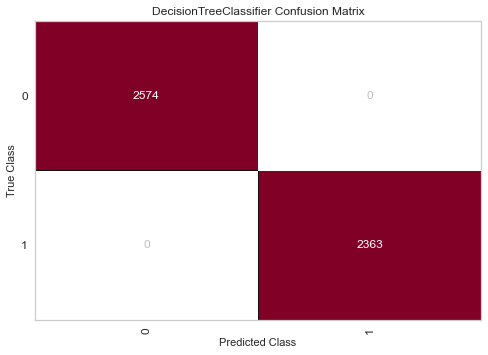

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [132]:
#Confusion Matrix
model = DecisionTreeClassifier()
visualizer = ConfusionMatrix(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

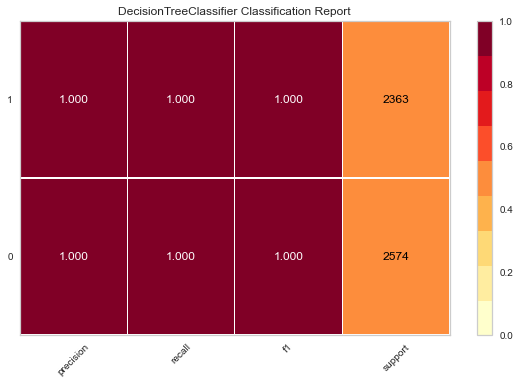

In [133]:
#classification report
visualizer = classification_report(model,X_train, y_train, X_test, y_test, support=True)

### Random Forest Classifier

In [134]:
## Finding best parameters
parameters={'n_estimators': (100,500,1100), 'criterion': ('gini', 'entropy'),
           'max_features': ('auto', 'sqrt', 'log2')}

model = RandomForestClassifier()

clf_RFC = GridSearchCV(model, parameters)

In [ ]:
clf_RFC = clf_RFC.fit(X_train,y_train)

In [ ]:
#Results of GridSearchCV
print('\n ============================================================================================')
print('\n Results of the GridSearchCV on Random Forest Classifier')#
print('\n ============================================================================================')
print('\n The best parameters to use in a model are: \n',clf_RFC.best_params_)
print('\n The best score achieved is: \n',clf_RFC.best_score_ )

In [ ]:
#Classifer being used in current Pipeline so future changes can be made
Model = RandomForestClassifier(criterion='entropy',max_features='log2',n_estimators=1100)

#splitting dataframe into numeric and categoric columns
numeric_features = ['likes_count','word_count','avg_word_length','stopwords_count',
                   'char_count','Sentiment']
numeric_transformer = Pipeline([('scaler',StandardScaler())])

#categorical_features = ['username']
#categorical_transformer = Pipeline([('Encoder',LabelEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)#('cat', categorical_transformer, categorical_features)
        ])
    
clf_DT = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Model)])



In [ ]:
#Fitting the model
clf_RFC_model = clf_RFC.fit(X_train,y_train)
#saving model
#pickle.dump( clf_RFC_model, open( "clf_RFC_model.p", "wb" ) )

#clf_RFC = pickle.load( open( "pickles/clf_RFC_model.p", "rb" ) )
#Making predictions with the model
ypred_RFC = clf_RFC.predict(X_test)

In [ ]:
#ConfusionMatrix
model = RandomForestClassifier()
visualizer = ConfusionMatrix(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
#classification report
visualizer = classification_report(model,X_train, y_train, X_test, y_test, support=True)

### XGBoost Classifier

In [86]:
#installing XGBoost
#!pip install xgboost

In [87]:
#creating DMatrix
data_dmatrix = xgb.DMatrix(data=X,label=training_scores_encoded)

In [88]:
## Finding best parameters
parameters={'learning_rate': (0.01,0.25,0.75), 'n_estimators': (100,1000),
           'max_depth': (3,4,5)}

model = xgb.XGBClassifier()

clf_XGB = GridSearchCV(model, parameters)

In [89]:
clf_XGB.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'learning_rate': (0.01, 0.25, 0.75),
                         'max_depth': (3, 4, 5), 'n_estimators': (100, 1000)})

In [90]:
#Results of GridSearchCV
print('\n ============================================================================================')
print('\n Results of the GridSearchCV on XGBoost Classifier')
print('\n ============================================================================================')
print('\n The best parameters to use in a model are: \n',clf_XGB.best_params_)
print('\n The best score achieved is: \n',clf_XGB.best_score_ )



 Results of the GridSearchCV on XGBoost Classifier


 The best parameters to use in a model are: 
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

 The best score achieved is: 
 1.0


In [91]:
#Classifer being used in current Pipeline so future changes can be made
Model = xgb.XGBClassifier(learning_rate= 0.01,max_depth=3, n_estimators= 100)

#splitting dataframe into numeric and categoric columns
numeric_features = ['likes_count', 'replies_count','retweets_count','word_count','avg_word_length','stopwords_count',
                   'char_count','Sentiment']
numeric_transformer = Pipeline([('scaler',StandardScaler())])

#categorical_features = ['username']
#categorical_transformer = Pipeline([('encoder',LabelEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        #('cat', categorical_transformer, categorical_features)])

clf_XGB = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Model)])

In [96]:
#fitting and making predictions with model
#clf_XGB = Model
clf_XGB_model = clf_XGB.fit(X_train,y_train)

#saving the model
#pickle.dump( favorite_color, open( "save.p", "wb" ) )
#pickle.dump(clf_XGB_model , open( "clf_XGB_model.p", "wb" ) )

#clf_XGB = pickle.load( open( "pickles/clf_XGB_model.p", "rb" ) )
#ypred_XGB = clf_XGB.predict(X_test)

ValueError: A given column is not a column of the dataframe

In [ ]:
#ConfusionMatrix
model = clf_XGB
visualizer = ConfusionMatrix(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
#classification report
visualizer = classification_report(clf_XGB,X_train, y_train, X_test, y_test, support=True)

## Model Selection

In [93]:
#ROC curves
#def ROC_Curve (Model, X,y):
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15)
    #model = Model
    #visualizer = ROCAUC(Model)

    #visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    #visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    #visualizer.show()     
    
from functions.Capstone_functions import *

interactive(children=(Dropdown(description='Model', options=(Pipeline(steps=[('preprocessor',
                …

<function functions.Capstone_functions.ROC_Curve(Model, X, y)>

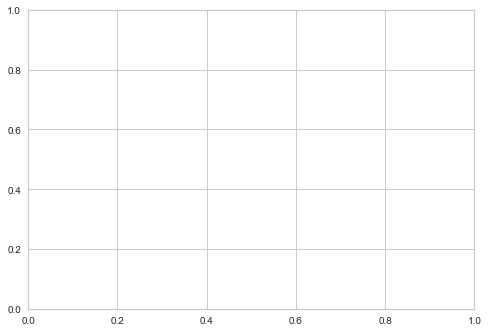

In [94]:
model_selection = [clf_DT,clf_RFC,clf_XGB]
interact(ROC_Curve,Model=model_selection,X=fixed(X),y=fixed(training_scores_encoded))

# Model Choice

With minimal difference between the Random Forest and XGBoost model in terms of precision and recall, the deciding factor was which model could possibly fit unseen data the best. Based on the ROC curves above, the RandomForest Classifier is the better model for making predictions with data that has not yet been seen.

In [ ]:
#Feature importances of XGBoost model
for feat, importance in zip(X.columns, clf_XGB.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

In [ ]:
#Feature Importances in Visual Form
(pd.Series(clf_XGB.feature_importances_, index=X.columns)
   .nlargest(len(X.columns))
   .plot(kind='barh'))   